#SKLearn Linear Regression
Memprediksi harga rumah berdasarkan luas rumah, jumlah kamar tidur, jumlah kamar mandi, dan jumlah tempat parkir menggunakan linear regression

###1. Import Library/Package  




In [130]:
import pandas as pd

###2. Gathering Data



In [131]:
data = pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [132]:
#menghapus kolom yang tidak dibutuhkan untuk mencapai tujuan
data.drop(['stories','mainroad','guestroom','basement', 'hotwaterheating','airconditioning','prefarea','furnishingstatus'], axis=1, inplace=True)

### 3. Asessing and Cleaning Data

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   parking    545 non-null    int64
dtypes: int64(5)
memory usage: 21.4 KB


In [134]:
#Check existing null-value
data.isna().sum()

price        0
area         0
bedrooms     0
bathrooms    0
parking      0
dtype: int64

In [135]:
#Check existing duplicate data
data.duplicated().sum()

2

In [136]:
#drop the duplicate data
data = data.drop_duplicates()

In [137]:
data.describe()

,price,area,bedrooms,bathrooms,parking
count,5.430000e+02,543.00000,543.000000,543.000000,543.000000
mean,4.769655e+06,5151.11418,2.968692,1.287293,0.696133
std,1.873177e+06,2172.53892,0.737088,0.503094,0.862141
min,1.750000e+06,1650.00000,1.000000,1.000000,0.000000
25%,3.430000e+06,3592.00000,2.500000,1.000000,0.000000
50%,4.340000e+06,4600.00000,3.000000,1.000000,0.000000
75%,5.757500e+06,6360.00000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.00000,6.000000,4.000000,3.000000


###4. Linear Regression Step

In [138]:
#memisahkan atribut dan label
y = data['price']
x = data[['area', 'bedrooms', "bathrooms", 'parking']]

In [139]:
#melakukan normalisasi pada atribut agar memiliki skala yang sama
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_data, columns = x.columns)

In [156]:
# membagi dataset menjadi data train dan data test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=42)

In [157]:
#membuat model regresi linear
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [158]:
#Latih model
model.fit(x_train, y_train)

LinearRegression()

In [159]:
# Evaluasi model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2044143236786.6733
R-squared (R2): 0.5128787433515608


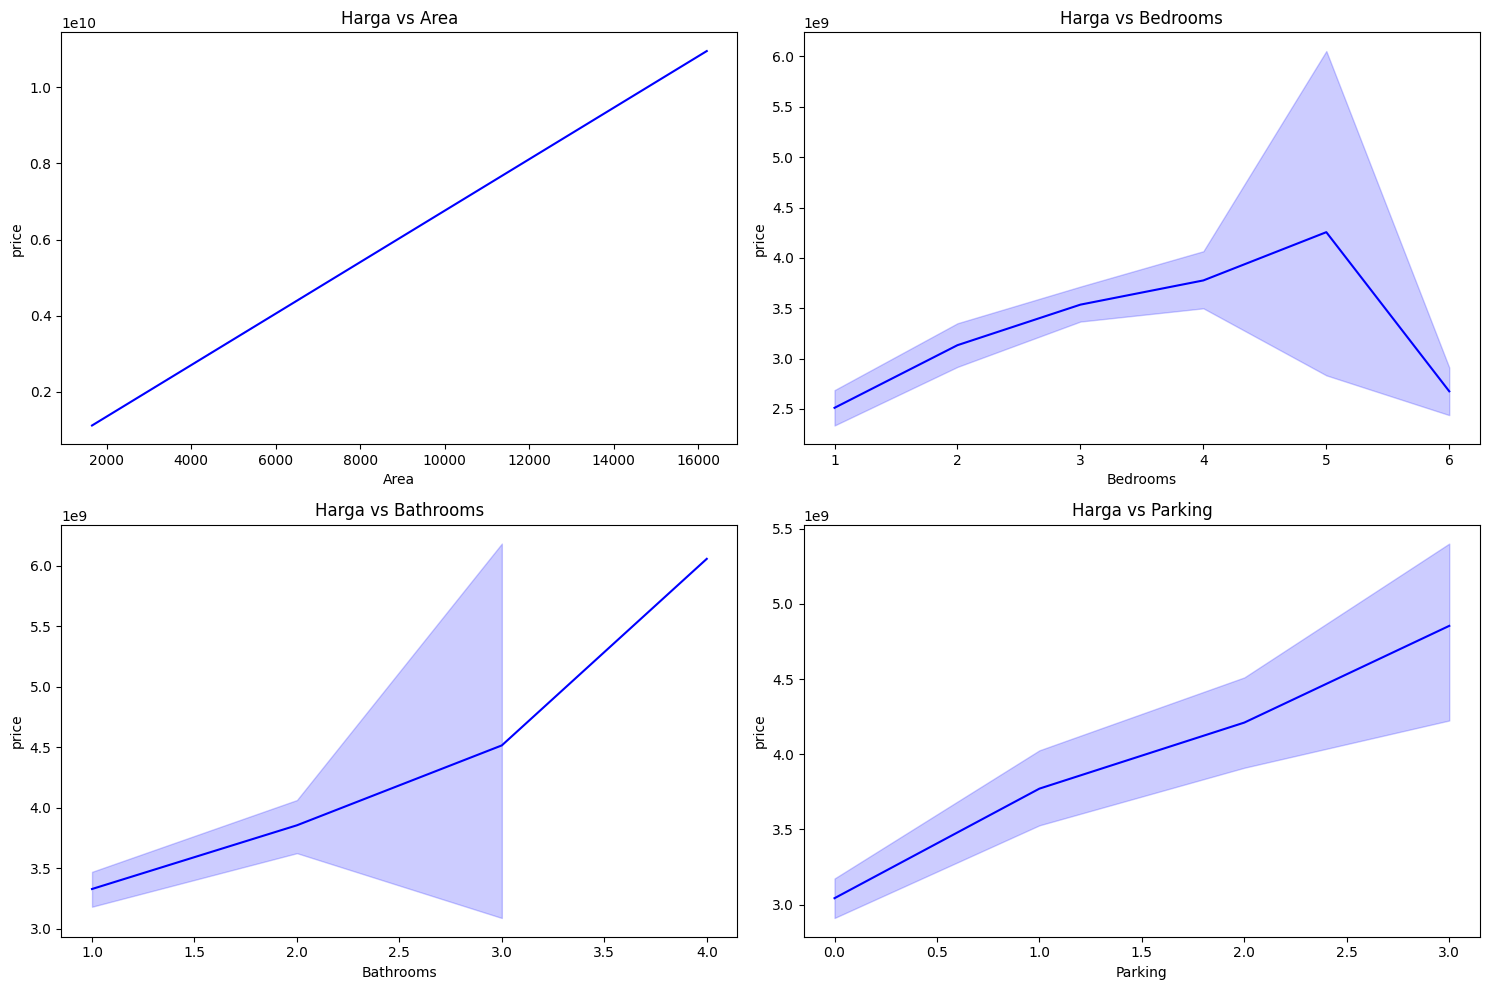

In [161]:
# Plot scatter dan garis regresi untuk masing-masing fitur
import matplotlib.pyplot as plt
import seaborn as sns

features = ['area', 'bedrooms', 'bathrooms', 'parking']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(x=data[feature], y=model.predict(data[features]), color='blue')
    plt.title(f'Harga vs {feature.replace("_", " ").capitalize()}')
    plt.xlabel(feature.replace("_", " ").capitalize())
    plt.ylabel('price')

plt.tight_layout()
plt.show()

**Berdasarkan plot di atas dapat diketahui bagaimana hubungan linear tiap fitur(x) terhadap harga, yaitu**

*   Luas Rumah (area): Hubungan linear yang kuat dan jelas dengan harga rumah. Prediksi harga berdasarkan luas rumah cenderung akurat.
*   Jumlah Kamar Tidur (bedrooms): Hubungan lebih kompleks dengan variasi yang besar, menunjukkan bahwa prediksi harga berdasarkan jumlah kamar tidur kurang akurat.
*   Jumlah Kamar Mandi (bathrooms): Hubungan positif linear tetapi dengan variasi besar, menunjukkan adanya ketidakpastian dalam prediksi.
*   Jumlah Tempat Parkir (parking): Hubungan positif linear dengan variasi yang lebih kecil, menunjukkan prediksi harga yang lebih akurat dibandingkan jumlah kamar tidur dan kamar mandi.



